### Check that the subclone annotation is not associated with cell cycle for ALL1

In [ ]:
import scanpy as sc
import pandas as pd

In [3]:
#Read clonal annotation
clones=pd.read_csv("ALL1-clones_final.txt",sep="\t")

#Reformat DNA index to match RNA index
clones['rna_index'] = clones['dna_library_id'].str.replace("D", "R", regex=False)
clones['rna_index'] = clones['rna_index'].str.replace("_", "-", regex=False)

In [4]:
clones.head()

,dna_library_id,clone,dna_reads,rna_counts,rna_phase,timepoint,rna_index
0,VZA01001D_A01,3_1,1185959,192050,G1,diagnosis,VZA01001R-A01
1,VZA01001D_A02,3_1,875737,137332,G1,diagnosis,VZA01001R-A02
2,VZA01001D_A03,3_1,864706,177335,G1,diagnosis,VZA01001R-A03
3,VZA01001D_A04,3_1,828150,306029,G1,diagnosis,VZA01001R-A04
4,VZA01001D_A05,NaN,20650,270,NaN,diagnosis,VZA01001R-A05


In [5]:
#Read RNA matrix
adata = sc.read_csv("input_ALL1/count_matrix.txt", delimiter='\t').T

In [6]:
adata

AnnData object with n_obs × n_vars = 262 × 20835

In [7]:
#Basic preprocessing
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

In [8]:
sc.pp.log1p(adata)
sc.pp.scale(adata)

In [9]:
adata

AnnData object with n_obs × n_vars = 262 × 15338
    obs: 'n_genes', 'n_counts'
    var: 'n_cells', 'mean', 'std'
    uns: 'log1p'

In [10]:
#Load cell cycle genes
cell_cycle_genes = [x.strip() for x in open("../annotations/regev_lab_cell_cycle_genes.txt")]

In [11]:
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]

In [12]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

/Users/kschmid/miniconda3/envs/py3_10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


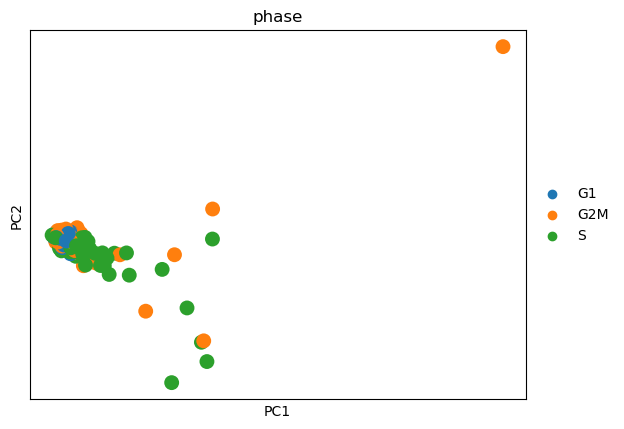

In [13]:
adata_cc_genes = adata[:, cell_cycle_genes]
sc.tl.pca(adata_cc_genes)
sc.pl.pca_scatter(adata_cc_genes, color='phase')

In [16]:
adata.obs.phase.value_counts()

G1     127
S       68
G2M     67
Name: phase, dtype: int64

In [18]:
clones.index=clones.rna_index

In [19]:
clones.head()

,dna_library_id,clone,dna_reads,rna_counts,rna_phase,timepoint,rna_index
rna_index,,,,,,,
VZA01001R-A01,VZA01001D_A01,3_1,1185959,192050,G1,diagnosis,VZA01001R-A01
VZA01001R-A02,VZA01001D_A02,3_1,875737,137332,G1,diagnosis,VZA01001R-A02
VZA01001R-A03,VZA01001D_A03,3_1,864706,177335,G1,diagnosis,VZA01001R-A03
VZA01001R-A04,VZA01001D_A04,3_1,828150,306029,G1,diagnosis,VZA01001R-A04
VZA01001R-A05,VZA01001D_A05,NaN,20650,270,NaN,diagnosis,VZA01001R-A05


In [22]:
adata.obs["clone"] = clones.clone[adata.obs.index]

In [24]:
pd.crosstab(adata.obs['phase'], adata.obs['clone'])

clone,1_1,2_3,3_1
phase,,,
G1,48,8,71
G2M,18,8,41
S,19,7,42
